In [27]:
from sklearn.datasets import load_digits
import pandas as pd
from matplotlib import pyplot as plt

In [29]:
df = load_digits()
df.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [31]:
# df.keys are different part of datasets:
# data: it contains features of dataset stored in 2D numpy array
# target: it is 1D array which is output column
# feature_names: array containing the name of features or column names.
# target_name: output values which are 0-9
# images: 3D Numpy array, each entry is an image
# Descr:  String that contains a detailed description of the dataset

In [ ]:
# You can print like this.....

#print(df['images'][0])
#print(df['target_names'][0])
#print(df['feature_names'][0])
#print(df['data'][0])


In [33]:
# simple convert kya hai dataframe mai where column names = feature_name and df = data
df_n = pd.DataFrame(df.data,columns=df.feature_names)


In [35]:
df_n.shape


(1797, 64)

In [37]:
df.target


array([0, 1, 2, ..., 8, 9, 8])

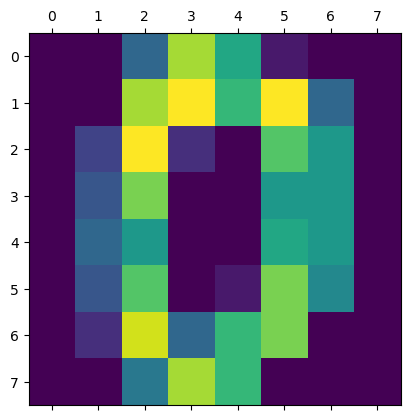

In [39]:
plt.matshow(df.data[0].reshape(8,8))
plt.show()


In [40]:
print('First Row Output is :',df['target'][0])

First Row Output is : 0


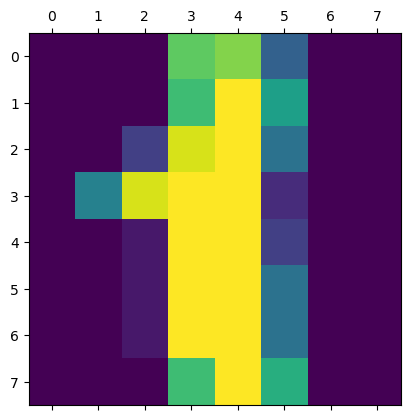

2nd row output is : 1


In [43]:
plt.matshow(df.data[1].reshape(8,8))
plt.show()
print('2nd row output is :',df['target'][1])


In [45]:
x = df_n
y = df.target


In [47]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
input_scaled = std.fit_transform(x)


In [49]:
# Simple Train Test Split kya hai bois...

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_scaled,y, test_size=0.2, random_state = 42)


In [50]:
# Now Model Selection:
# You can use any supervised classification algorithm...



from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)
# so we've 97% accuracy without PCA.


0.9722222222222222

In [51]:
# Now PCA ka time agaya hai...
'''
PCA Use krne k 2 tariqe hain, like first technique mai ap random columns dedo like i want n no of columns like n=5
or dosri technique PCA(0.95) or any other it means k wh columns uthao jis ki variance atleast minimum 95% ho.
I think 2nd technique best hai for feature_selection baki ap ki marzi.
'''


from sklearn.decomposition import PCA
pca = PCA(0.95)
input_pca = pca.fit_transform(x)
input_pca.shape # that mean 29 columns aise hain jo bht bht bht important hain coz un ki variance 95% ya us sai zada h
# total columns 64 thy (df_n.shape) so 64-29 = 35 so 35 columns bekar thy jo useful nahi thy


(1797, 29)

In [53]:
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(input_pca,y, test_size=0.2, random_state=42)


In [54]:
lr_pc = LogisticRegression()
lr_pc.fit(x_train_pca,y_train_pca)
lr_pc.score(x_test_pca,y_test)
# so we have got almost whi accuracy jo without pca k thy so pca use krne sai benefit ye hai optimize hogaya dataset with same accuracy


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9611111111111111

In [56]:
# Chalo ab n_compenent sai beh krdete hain .... like khud btao k ktne columns chahie
pca_com = PCA(n_components=2)
x_com_pca = pca_com.fit_transform(x)
x_com_pca.shape


(1797, 2)

In [57]:
x_train_pca_n_com, x_test_pca_n_com, y_train_pca_n_com, y_test_pca_n_com = train_test_split(x_com_pca,y, test_size=0.2, random_state=42)


In [60]:
lr_n_com = LogisticRegression()
lr_n_com.fit(x_train_pca_n_com,y_train_pca_n_com)
lr_n_com.score(x_test_pca_n_com,y_test)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6416666666666667

In [143]:
df = pd.read_csv('train.csv')


In [145]:

#STRATEGY:

# Missing Values:
# One Hot Encoding:
# Feature Scaling:
# Feature Selection:


In [147]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [149]:

from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline


In [151]:
df.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)


In [153]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=['Survived']),df['Survived'],test_size=0.2,random_state=42)


In [155]:
x_train.head()


,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
331,1,male,45.5,0,0,28.5000,S
733,2,male,23.0,0,0,13.0000,S
382,3,male,32.0,0,0,7.9250,S
704,3,male,26.0,1,0,7.8542,S
813,3,female,6.0,4,2,31.2750,S


In [157]:
trf1=ColumnTransformer(
    [
        ('impute_age',SimpleImputer(),[3]), # 2 means index 2 p age hai.
        ('impute_embarked',SimpleImputer(strategy='most_frequent'),[6])  # 6 means index 6 p Embarked hai.
    ],remainder='passthrough')


In [173]:
trf2 = ColumnTransformer(
    [
        ('ohe_gender_embarked', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), [1, 6])
    ],
    remainder='passthrough'
)

In [175]:
trf3=ColumnTransformer(
        [('scale',MinMaxScaler(),slice(0,10))] # ap categorical ko skip beh krskty ho and 10 is lye dye coz one hot encoding k columns beh addw hwe hain
    )


In [177]:
trf4 = DecisionTreeClassifier()


In [179]:
pipe = make_pipeline(trf1,trf2,trf3,trf4)


In [181]:
from sklearn import set_config
set_config(display='diagram')

In [183]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_age', SimpleImputer(),
                                                  [3]),
                                                 ('impute_embarked',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [6])])),
                ('columntransformer-2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_gender_embarked',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [1, 6])])),
                ('columntransformer-3',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 10, None))])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [185]:
y_pred = pipe.predict(x_test)


In [187]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)


0.6256983240223464

In [189]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))
